In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3.0, 3.0, 100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

# 1.用sklearn中的pipeline 进行数据的拟合

degree = 1

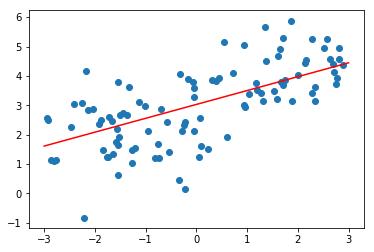

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

Lin_reg = LinearRegression()
def polyReg(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", Lin_reg)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

poly_reg1 = polyReg(degree=1)
poly_reg1.fit(X_train,y_train)

plt.scatter(x, y)
x_plot = np.linspace(-3.0, 3.0, 100).reshape(-1,1)
y_plot = poly_reg1.predict(x_plot)
plt.plot(x_plot , y_plot, color='r')
plt.show()

In [3]:
from sklearn.metrics import mean_squared_error
y_test_predict1 = poly_reg1.predict(X_test)
mse_test1 = mean_squared_error(y_test, y_test_predict1)
mse_test1

1.1668274438546562

In [4]:
y_train_predict1 = poly_reg1.predict(X_train)
mse_train1 = mean_squared_error(y_train, y_train_predict1)
mse_train1

0.9432141582430135

In [5]:
Lin_reg.coef_

array([0.        , 0.79065948])

# 为方便后续操作,将上述步骤写成一个函数

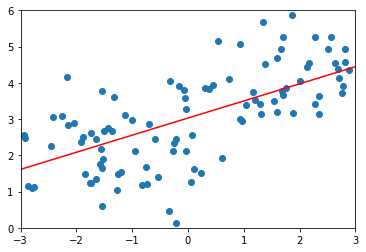

In [6]:
def plot_model(model):
    
    x_plot = np.linspace(-3.0, 3.0, 100).reshape(-1,1)
    y_plot = model.predict(x_plot)
    
    plt.scatter(x, y)
    plt.plot(x_plot , y_plot, color='r')
    plt.axis([-3.0, 3.0, 0, 6])
    plt.show()
plot_model(poly_reg1)

degree = 2


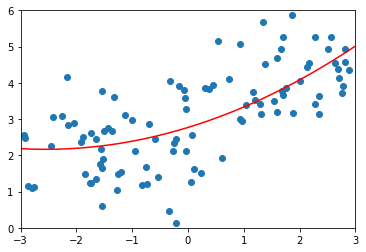

In [7]:
poly_reg2 = polyReg(degree=2)
poly_reg2.fit(X_train,y_train)

plot_model(poly_reg2)

In [8]:
y_test_predict2 = poly_reg2.predict(X_test)
mse_test2 = mean_squared_error(y_test, y_test_predict2)
mse_test2

1.2298449165203633

In [9]:
y_train_predict2 = poly_reg2.predict(X_train)
mse_train2 = mean_squared_error(y_train, y_train_predict2)
mse_train2

0.8877980752889811

degree = 10

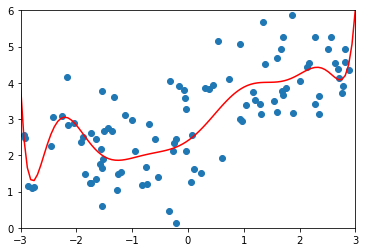

In [10]:
poly_reg10 = polyReg(degree=10)
poly_reg10.fit(X_train,y_train)

plot_model(poly_reg10)

In [11]:
y_test_predict10 = poly_reg10.predict(X_test)
mse_test10 = mean_squared_error(y_test, y_test_predict10)
mse_test10

1.509531477838909

In [12]:
y_train_predict10 = poly_reg10.predict(X_train)
mse_train10 = mean_squared_error(y_train, y_train_predict10)
mse_train10

0.7047019977747048

degree = 20

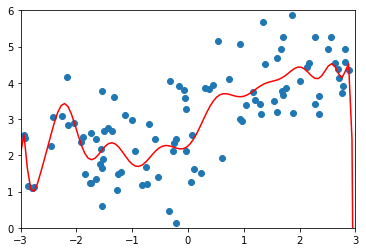

In [13]:
poly_reg20 = polyReg(degree=20)
poly_reg20.fit(X_train,y_train)

plot_model(poly_reg20)

In [14]:
y_test_predict20 = poly_reg20.predict(X_test)
mse_test20 = mean_squared_error(y_test, y_test_predict20)
mse_test20

1.4941045706997407

In [15]:
y_train_predict20 = poly_reg20.predict(X_train)
mse_train20 = mean_squared_error(y_train, y_train_predict20)
mse_train20

0.6562649888036399

degree = 30

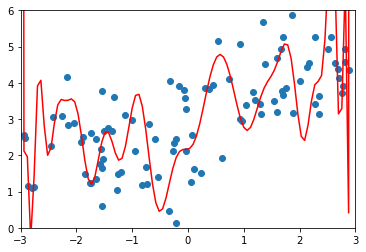

In [16]:
poly_reg30 = polyReg(degree=30)
poly_reg30.fit(X_train,y_train)

plot_model(poly_reg30)

In [17]:
y_test_predict30 = poly_reg30.predict(X_test)
mse_test30 = mean_squared_error(y_test, y_test_predict30)
mse_test30

2.757339730622099

In [18]:
y_train_predict30 = poly_reg30.predict(X_train)
mse_train30 = mean_squared_error(y_train, y_train_predict30)
mse_train30

0.970275713138278

degree = 50

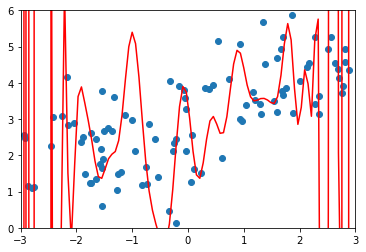

In [19]:
poly_reg50 = polyReg(degree=50)
poly_reg50.fit(X_train,y_train)

plot_model(poly_reg50)

In [20]:
y_test_predict50 = poly_reg50.predict(X_test)
mse_test50 = mean_squared_error(y_test, y_test_predict50)
mse_test50

16027842.464907793

In [21]:
y_train_predict50 = poly_reg50.predict(X_train)
mse_train50 = mean_squared_error(y_train, y_train_predict50)
mse_train50

1.3593416869701067

由上述例子可以看出,随着阶数degree的增大, 曲线的波动越来越大,在一定的范围内, 训练数据集的均方误差(mse)随着阶数的增大而减小; 测试数据集的均方误差(mse)随着阶数的增大而增大,这说明随着阶数degree的增大, 出现了过拟合


In [22]:
Lin_reg.coef_

array([-2.74906124e+13, -2.05733315e+01, -1.45483305e+02,  2.97092045e+03,
        1.21798696e+04, -1.54764569e+05, -5.29063757e+05,  4.43035671e+06,
        1.35667649e+07, -7.86553905e+07, -2.21472097e+08,  9.26246037e+08,
        2.46242819e+09, -7.55574624e+09, -1.95802719e+10,  4.38492754e+10,
        1.14849626e+11, -1.83189003e+11, -5.04865093e+11,  5.48105174e+11,
        1.66628011e+12, -1.13734233e+12, -4.06905011e+12,  1.48114272e+12,
        7.04812569e+12, -7.56734138e+11, -7.72000725e+12, -9.73076805e+11,
        3.10494016e+12,  1.86812558e+12,  4.21332644e+12, -4.43221920e+11,
       -5.80670174e+12, -1.48920381e+12, -9.61394130e+11,  1.07453507e+12,
        5.72821156e+12,  7.02905674e+11, -4.27591820e+11, -7.29314114e+11,
       -5.83949301e+12, -7.92885218e+11,  2.14112081e+12,  1.40627330e+12,
        5.65117252e+12, -7.76657109e+11, -7.02594564e+12,  1.71289346e+11,
        3.28545703e+12, -7.89786497e+09, -5.81108926e+11])

可以看到，与degree = 1相比, degree = 50 ,前拟合时,有些不必要"特征"的系数（权重）太大,从而影响模型的效果,   
解决办法：正则化，也叫岭回归

# 2.用sklearn中的Ridge(岭回归/模型正则化)解决数据过拟合问题

In [27]:
from sklearn.linear_model import Ridge

def RidgeReg(degree, alpha):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("Rid_reg", Ridge(alpha=alpha))
    ])

Rid_Reg= RidgeReg(degree=50, alpha=1)
Rid_Reg.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=50, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Rid_reg', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [28]:
y_test_predict = Rid_Reg.predict(X_test)
mse_test= mean_squared_error(y_test, y_test_predict)
mse_test

1.3594952129615046

In [30]:
y_train_predict = Rid_Reg.predict(X_train)
mse_train= mean_squared_error(y_train, y_train_predict)
mse_train

0.72759061195567

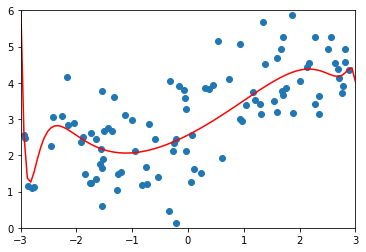

In [29]:
plot_model(Rid_Reg)

虽然 degree = 50， 数据过拟合,但是模型正则化(岭回归)之后，测试数据的均方误差(mse), 和训练数据的均方误差(mse
) 与degree = 1（即不过拟合,也不欠拟合）时相当,   
从图形中也可以看出,进行模型正则化之后的拟合曲线与未进行模型正则化时的拟合曲线 明显平滑了许多.   

当Ridge 的参数 alpha很大时, 根据模型正则化的表达式,可以得出,将"逼迫"特征的系数为0,此时拟合曲线近似一条水平的直线

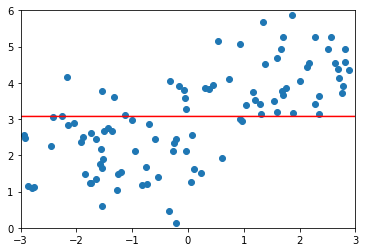

In [31]:
Rid_Reg= RidgeReg(degree=50, alpha=10000000)
Rid_Reg.fit(X_train, y_train) 
plot_model(Rid_Reg)